In [19]:
# This code takes the input of a netCDF file received from the TROPOMI instrument on the
# Sentinel-5 Precursor satellite. My dataset is a subset of the TROPOMI data that focuses
# on the western US during the months of August, September, and October 2020. My dataset 
# consists of multiple atmospheric constituents including NO2, CO, HCHO, O3, and possibly PM10.

In [20]:
#pip install geopandas

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [22]:
file = 'tropomi/NO2/AUGUST/S5P_NO2_20200801.nc'

In [23]:
ds = nc.Dataset(file)

In [24]:
#GET VARIABLES
product = ds.groups['PRODUCT']
time = product.variables['time']
lat = product.variables['latitude']
long = product.variables['longitude']
no2 = product.variables['nitrogendioxide_tropospheric_column']
lat = lat[:]
long = long[:]
no2 = no2[:]

In [25]:
#RESHAPE ARRAY
lat_vals = []
long_vals = []
no2_vals = []
for i in range(no2.shape[1]):
    for j in range(no2.shape[2]):
        lat_vals.append(lat[0,i,j])
        long_vals.append(long[0,i,j])
        no2_vals.append(no2[0,i,j])

In [26]:
#CREATE DATAFRAME
df = pd.DataFrame({'Longitude':long_vals,'Latitude':lat_vals,'NO2':no2_vals})

df['NO2'] = 100000*df['NO2']

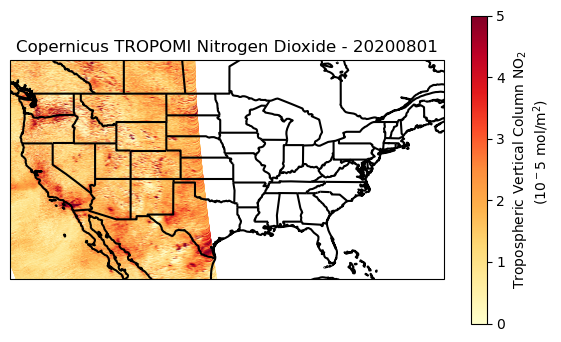

In [27]:
#PLOT FIGURE
states = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',
                             facecolor='none')
fig = plt.figure(figsize=(7,4))
ax=plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-126,-65,23,50])
ax.add_feature(states,zorder=3,linewidth=1.5)
ax.add_feature(cfeature.BORDERS,zorder=3,linewidth=1.5)
ax.add_feature(cfeature.COASTLINE,zorder=3,linewidth=1.5)
plot1 = ax.scatter(df['Longitude'],df['Latitude'],c=df['NO2'],cmap='YlOrRd',vmin=0.00000,vmax=5)
plt.title('Copernicus TROPOMI Nitrogen Dioxide - 20200801')
plt.colorbar(plot1,label='''Tropospheric Vertical Column NO$_2$
        (10$^-5$ mol/m$^2$)''')
plt.savefig('/home/averstyn/tropomi/NO2/AUGUST/plots/S5P_20200801_NO2.png')
plt.show()

'/home/averstyn'